## K-means and Mean shift

- K-means
    - Method for clustering data in a dataspace
    - Determine the amount of clusters ‘k’
    - Randomly selects k data-points to be the k’th cluster's centroids.
    - For every point, add them to the centroid with the shortest distance.
    - Calculate new centroids based on the average position of all datapoints in the cluster. 
    - Repeat the two last steps

    - K-means is a fast clustering algorithm that converges around local minimums. 
    - It is very sensitive to the randomly selected initial centroids
    - It is not robust towards outliers
    - You have to determine the amount of clusters prior to running the algorithm

- Mean shift
    - Method for clustering data in a dataspace
    - Randomly select an initial point and calculates the average position of all points within a defined bandwidth (or window-size)
    - ‘Shifts’ position to the average and performs the next shift
    
    - Mean shift is considered a non-parametric and robust (to outliers) clustering method, but can be slow on high-dimensional data and results are really dependant on the selected bandwidth
    - Mean shift is still considered non-parametric even though it takes a bandwidth. Since Mean shift still scales with the data it is trained with without changing the parameter. The bandwidth is considered a Hyper parameter


## K-means and Agglomerative clustering

- K-means
    - Method for clustering data in a dataspace
    - Determine the amount of clusters ‘k’
    - Randomly selects k data-points to be the k’th cluster's centroids.
    - For every point, add them to the centroid with the shortest distance.
    - Calculate new centroids based on the average position of all datapoints in the cluster. 
    - Repeat the two last steps
    
    - K-means is a fast clustering algorithm that converges around local minimums. 
    - It is very sensitive to the randomly selected initial centroids
    - It is not robust towards outliers
    - You have to determine the amount of clusters prior to running the algorithm
- Agglomerative clustering
    - Bottom-up approach to Hierarchical clustering
    - Consider every point as its own tiny cluster
    - Pair the two closest clusters and make them into a parent cluster
    - Repeat (probably until all points are in a single cluster)

    - Agglomerative clustering can be analyzed using a dendrogram to get a visual representation of how close the clusters are to each other. Using a dendrogram a cut-point can be made to determine what clusters of the hierarchy to use
    - Hierarchical clustering is a very flexible clustering method that adapts to the shapes of the points close to each other. It is very flexible with the amount of clusters (as you can choose yourself after running the algorithm), but it is not balanced as outliers will end up in their own tiny clusters. It is a slow algorithm
    - Divisive clustering is Agglomeratives brother where you go top-down. Start with one big cluster and split into smaller clusters

## K-means and ELBOW

- K-means
    - Method for clustering data in a dataspace
    - Determine the amount of clusters ‘k’
    - Randomly selects k data-points to be the k’th cluster's centroids.
    - For every point, add them to the centroid with the shortest distance.
    - Calculate new centroids based on the average position of all datapoints in the cluster. 
    - Repeat the two last steps
    - 
    - 
    - K-means is a fast clustering algorithm that converges around local minimums. 
    - It is very sensitive to the randomly selected initial centroids
    - It is not robust towards outliers
    - You have to determine the amount of clusters prior to running the algorithm
- ELBOW
    - Elbow is used to determine the number of clusters used for k-means.
    - Run K-means different k’s sum the square-distances from each point to their corresponding centroid. Then make a graph from k to the distance-sum to see how the different k’s affect the precision of the clusters
    - Now pick k, such that the slope of the graph is starting to flatten. 
    - In layman terms pick k and the graph’s ‘elbow’. Right where the slope goes from a big dive and starts to flatten, hence the name


# Clustering
This exercise is about clustering (_K-means clustering_, _Mean-shift clustering_, and _Agglomerative_) pose data used for the exercises in week 2
 and week 10
. The task includes applying and experimenting with each method and then comparing their outcomes. The comparison will be conducted by clustering a sequence of human poses using these three methods in similar steps.
The dataset tensor contains 1403 pose sequences. Each sequence is a 100-frames time series capturing human poses. Each pose consists of 25 skeletal joints, where each joint is defined by an x and y coordinate ($25 \cdot 2$). The shape of the dataset tensor is $(1403, 100, 25 \cdot 2)$. For this exercise, you will use a single pose sequence of 100 frames and apply clustering to the sequence.
## Task overview
For each clustering method you will:
- Implement the method.
- Plot the clusters in the sequence.
- Plot the cluster centers.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#loading00">Task 1: Introduction</a>
            </li>
            <li>
            <a href="#loading_files">Task 2: Setting up the data</a>
            </li>
            <li>
            <a href="#loading">Task 3: Fitting the algorithm</a>
            </li>
            <li>
            <a href="#loading2">Task 4: K-means clustering visualization</a>
            </li>
            <li>
            <a href="#loading02">Task 5: Cluster characteristics 1</a>
            </li>
            <li>
            <a href="#loading022">Task 6: Cluster centers</a>
            </li>
            <li>
            <a href="#loading023">Task 7: Cluster centers</a>
            </li>
            <li>
            <a href="#loading3">Task 8: Elbow Method</a>
            </li>
            <li>
            <a href="#loading4">Task 9: Fitting the mean-shift algorithm</a>
            </li>
            <li>
            <a href="#loading5">Task 10: Visualizing clusters</a>
            </li>
            <li>
            <a href="#loading9">Task 11: Reflection and the bandwith parameter</a>
            </li>
            <li>
            <a href="#loading10">Task 12: Dendrograms</a>
            </li>
            <li>
            <a href="#loading123">Task 13: Dendogram</a>
            </li>
            <li>
            <a href="#loading11">Task 14: Fitting the agglomerative clustering alg…</a>
            </li>
            <li>
            <a href="#loading12">Task 15: Agglomerative clustreing algorithm mean …</a>
            </li>
            <li>
            <a href="#loading122">Task 16: Agglomerative clustreing algorithm mean …</a>
            </li>
            <li>
            <a href="#loading13">Task 17: Compare and reflect on the methods</a>
            </li>
        </ul>
    </div>
</article>


---
**Task 1 (easy): Introduction💡**
1. Which information can be obtained by clustering a sequence of pose data. Include distance metrics and window size in your discussion.
2. Identify possible pitfalls.


---

In [1]:
# Write reflections here...
answer = "Clusters/groups of similar animations" \
        "The groups are defined by the distances between the different poses and poses/animations that are similar are grouped together" \
        "Examples of information that could be gathered are different badminton-stroke" \
        "" \
        "" \
        "" \
        ""

The following cells import libraries and provide functions for plotting the poses:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from clustering_utils import *

accuracies = [
]
accuracies= []


# Suppress the specific warning
warnings.filterwarnings("ignore")


---
**Task 2 (easy): Setting up the data👩‍💻**
1. Run the cell below to load and reshape the dataset.
2. Choose the 100th pose sequence as the dataset.


---

In [3]:
data = np.load('Poses_norm.npy')
N,T,D,C = data.shape
reshaped_data = data.reshape(N,T,D*C)
sequence = reshaped_data[99]
print(sequence.shape)

(100, 50)


## K-means Clustering
In this  exercise you will use k-means clustering on a pose sequence. 

---
**Task 3 (easy): Fitting the algorithm👩‍💻**
1. Run the cell below to create an instance of the `KMeans`
 class with 7 clusters and to find clusters in the sequence.


---

In [4]:
# Specify the number of clusters (k)
k = 8

# Create KMeans 
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit to the data
kmeans.fit(sequence)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'



---
**Task 4 (easy): K-means clustering visualization👩‍💻**
1. Use the [documentation on the `labels_`
 attribute.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
 to obtain cluster labels. 
2. Use the `plot_single_pose`
 function from the file `clustering _utils.py`
 to color each pose in the pose sequence according to which cluster it belongs to. 


---

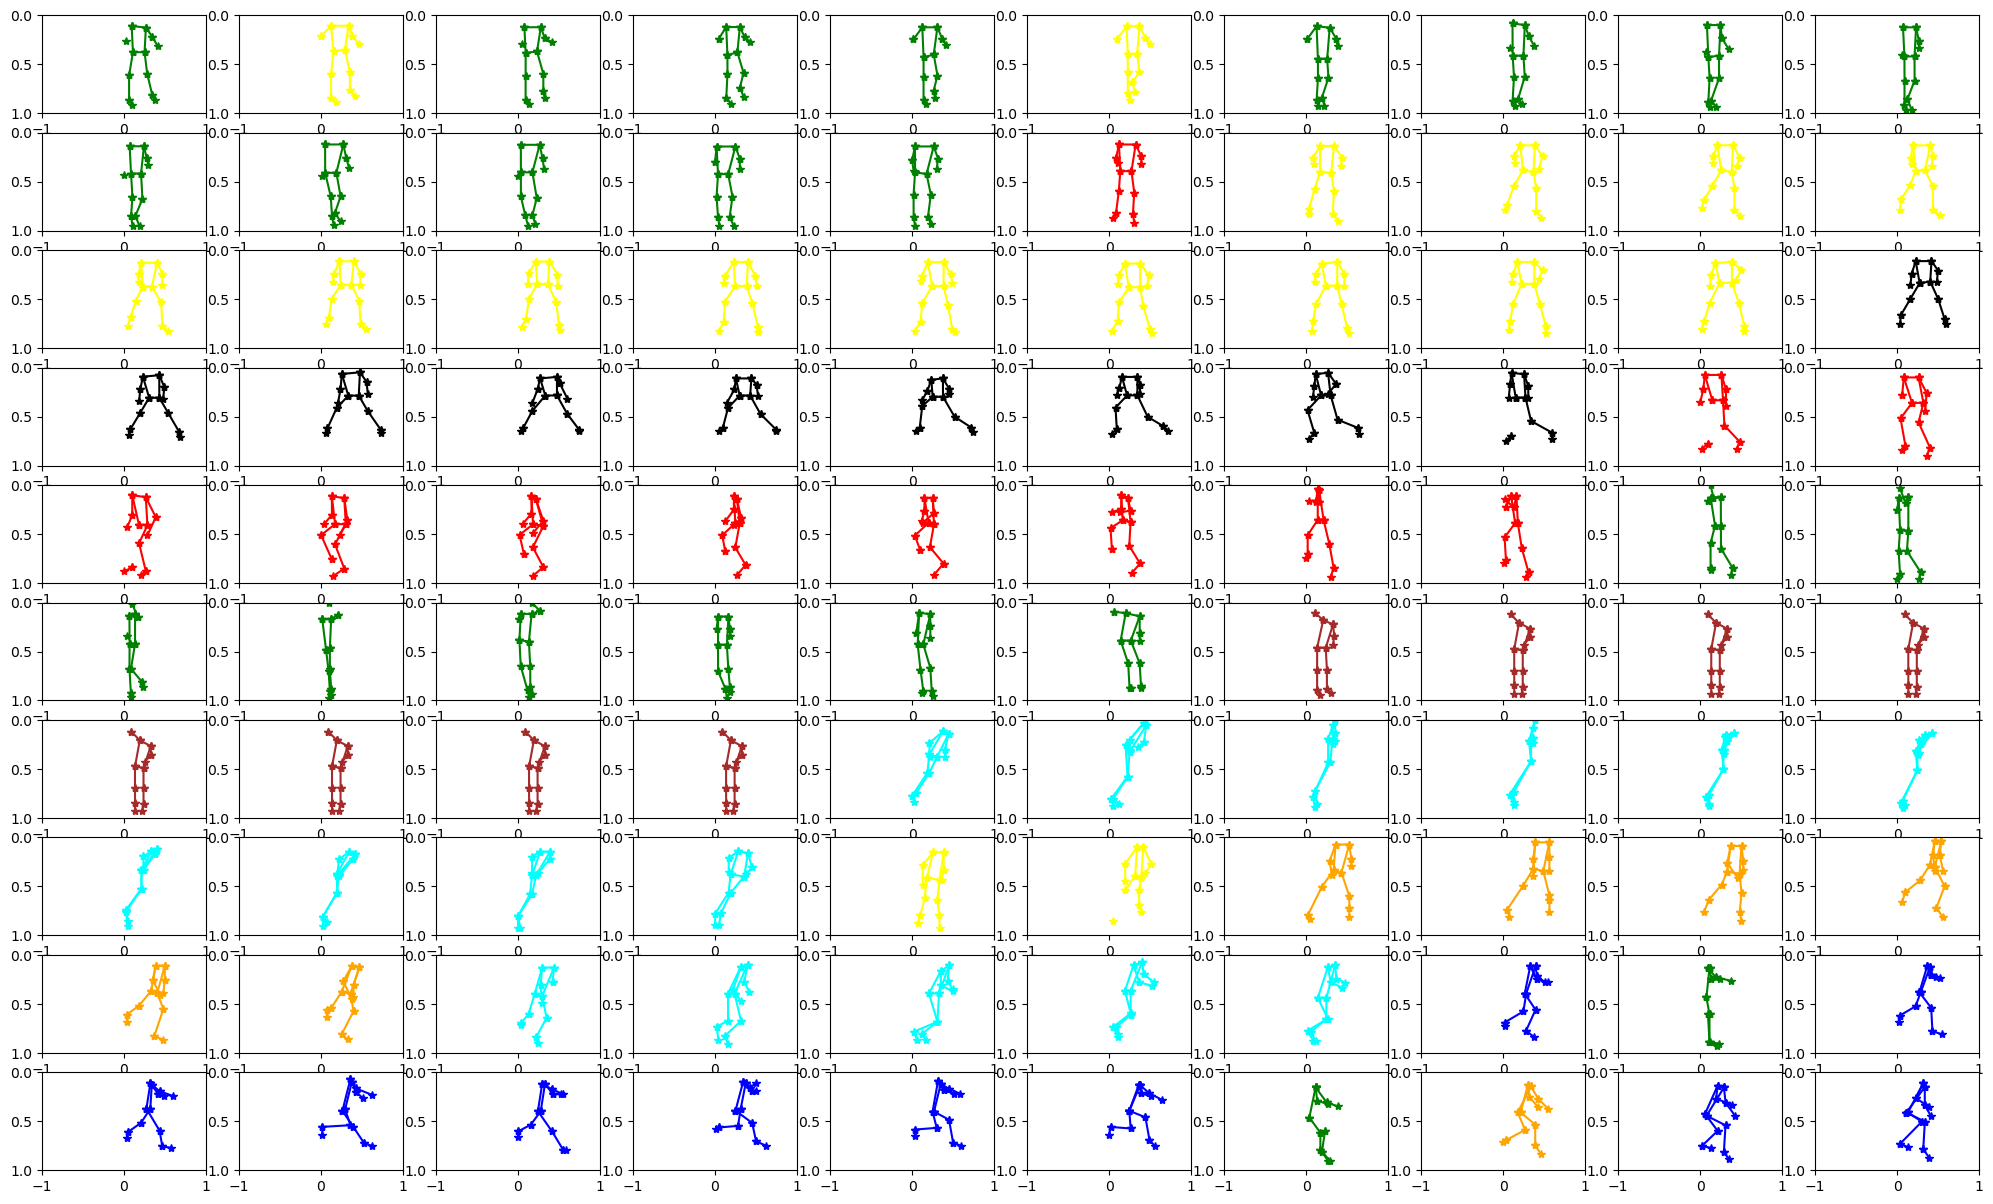

In [5]:
# Write your solution here
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# You can now use 'cluster_labels' to see which cluster each frame belongs to
# 'centroids' contains the coordinates of the cluster centers

colors = {0: 'red', 1: 'blue', 2: 'green', 3: "orange", 4: "black", 5: "brown", 6: "yellow", 7: "cyan"}  # Map cluster labels to colors
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)


---
**Task 5 (easy): Cluster characteristics 1💡**
1. What characterizes the _blue_, _green_ and _red_ poses?


---

In [6]:
# Write your reflections here...
answers = "" \
"Red is spreadingeagle/missing legs" \
"Blue is jumping/running sideways with arms out" \
"Green is standing straight (menacingly)"


---
**Task 6 (easy): Cluster centers👩‍💻**
1. Run the cell below to extract and plot the cluster centers.


---

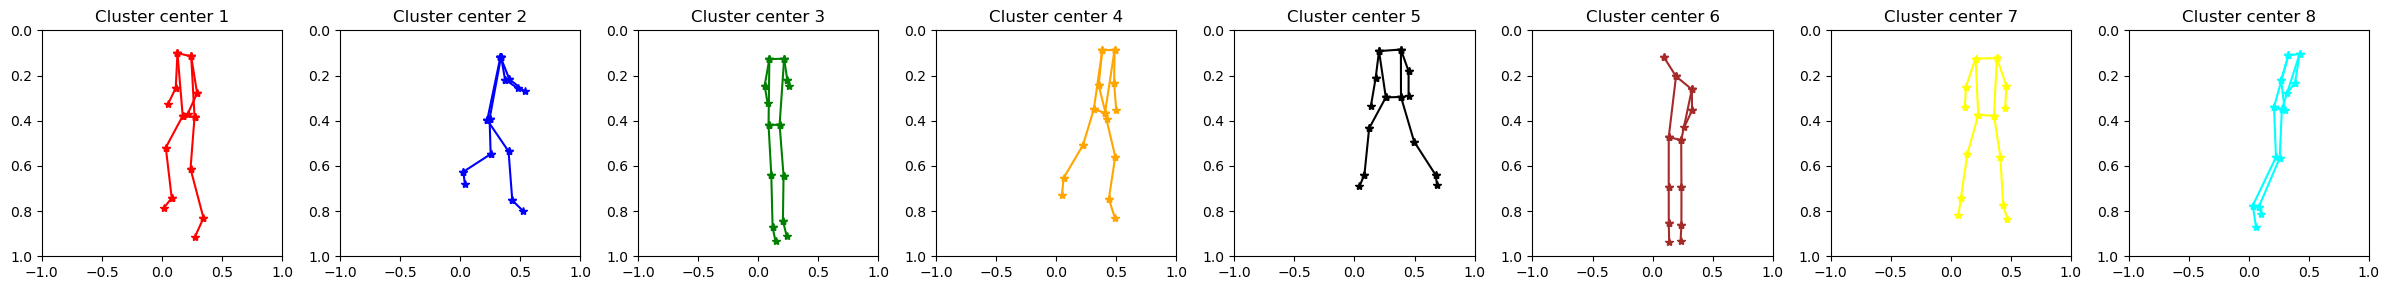

In [7]:

num_centroids = len(centroids)
# Set up subplots
fig, axes = plt.subplots(1, num_centroids, figsize=(num_centroids * 3, 3))

# Assuming you have a function plot_single_pose defined
for i in range(len(centroids)):
    plt.subplot(1, len(centroids), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(centroids[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.tight_layout()
plt.show()


---
**Task 7 (easy): Cluster centers👩‍💻💡📽️**
1. Visually inspect the results and identify the characteristics of the poses in each cluster: 
    - What distinguishes the clusters?
    - What do the cluster centers represent?
    - What do the clusters reveal about poses?
    - How do the cluster centers relate to your observations in [Task 5](#loading02)?


2. Reason about the choice of 7 clusters and the effect on the result.

3. Change the random state and fit the model again. Explain whether you obtain different groupings and why? 



---

In [8]:
# Write your reflections here...
accurate_anwsers= "01-Clustering.ipynb" \
"Red is looking right (from their pov perspective)" \
"Blue is default dancing (fort-knight) left with arms out(from their poc perspective)" \
"Green is standing (menacingly) (from our pov pespcetive)" \
"orange is looking left (from their pesptive)" \
"Black is falling over (from all pespitivities(pov)" \
"Brown is defualt (from our pesptivities)" \
"yellow is gone (stamping on the ground (from their pesppist))" \
"" \
"The clusters center represent the most basic of poses in their cluster (the very mean pose)" \
"the cluster reveal that they are different" \
"" \
"We got red wrong blue and green were absolutely spot on! (it hurts to say)" \
"" \
"the choice of the 7 clusters meant that we got 7 clusters. and the amount of clusters we got was seven" \
""

This task is about using the Elbow Method to choose the number of clusters `k`
.

---
**Task 8 (medium): Elbow Method👩‍💻💡📽️**
The cell below:
- Applies k-means clustering to the sequence using each `k`
 in the interval `k_range`
.
- Extracts the within-cluster sum of squares (WCSS) using [`kmeans.intertia_`
](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)
 and store it in a list.
- Plots the within-cluster sum of squares as a function of the number of clusters (elbow curve as displayed below) 

1. Explain the reasons for using WCSS to choose the number of clusters. 

2. What charaterizes the optimal WCSS for choosing the number of clusters?

3. Visually determine the optimal number of clusters.

4. Calculate the rate of change for the elbow curve and plot its absolute value. Use the curve to determine the optimal `k`
.

5. Revisit and run the previous tasks ([Task 3](#loading), [Task 4](#loading2) and [Task 5](#loading02) ) with the optimal number of clusters. 

6. How does the elbow method influence the results in the previous tasks?



---

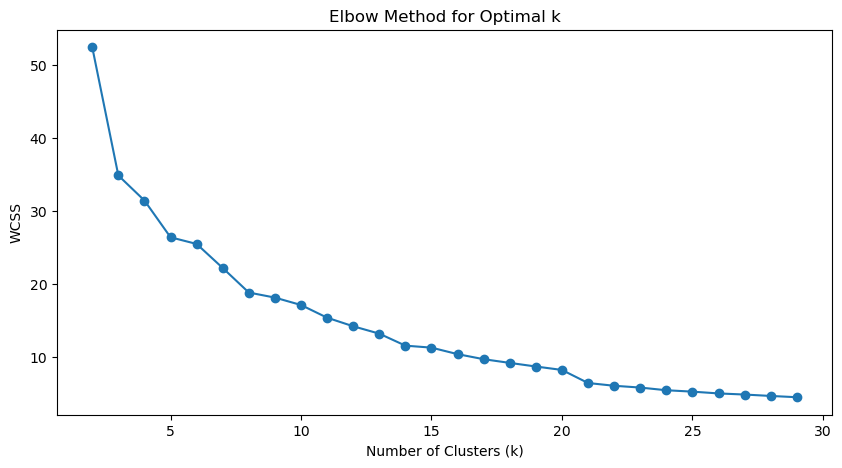

17.559181279254595
3.4252220180998556
5.035210883411878
0.913479690161239
3.2889068393025624
3.3613536479486754
0.6930024205180771
1.0129499247703784
1.7375764773967592
1.174211672645118
1.0112320985471275
1.642382048755593
0.27181250264320234
0.8906993743910157
0.6923914039365666
0.5061889243107682
0.4938721168416276
0.47125341486497163
1.7890151450747735
0.37637557753592343
0.24601845584614868
0.36632268806333546
0.19225178326846937
0.24429488330804094
0.1523890592442676
0.1926785616738096
0.17439148175465835


In [9]:
# Find the optimal k using the elbow method
k_range = range(2, 30) # values for the number of clusters `k`
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sequence)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()
for a, b in zip(inertia[1:], inertia[:-1]):
    print((b-a)/1)

In [10]:
# Write your reflections here...

answerss= "01-Clustering.ipynb" \
"at some point increasing the number of clusters does not improve the error of the clustes significantly enough to be worth." \
"the optimal amount of clusters is at the point where the slope start to flatten out, a good default slope(from fork-knife) is >-1" \
"8" \
"We got more distinct poses"

## Mean-shift Clustering
This exercise is about applying mean-shift clustering to the sequence of poses. 

---
**Task 9 (easy): Fitting the mean-shift algorithm👩‍💻**
1. Run the cell below to:    - create an instance of the `MeanShift()`
 class with a bandwith of 0.629 
    - cluster the pose sequence.




---

In [20]:
# Perform Mean Shift clustering
mean_shift = MeanShift(bandwidth=0.829)
mean_shift.fit(sequence)

,bandwidth,0.829
,seeds,None
,bin_seeding,False
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300



---
**Task 10 (easy): Visualizing clusters👩‍💻**
1. Extract the cluster labels for each pose in the sequence. Use the `labels_`
 attribute as described in the [documentation on mean-shift clustering.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

2. Visualize the pose sequence, assigning a distinct color to each pose based on its cluster.
3. Extract and plot the cluster centers using the `cluster_centers_`
 attribute.


---

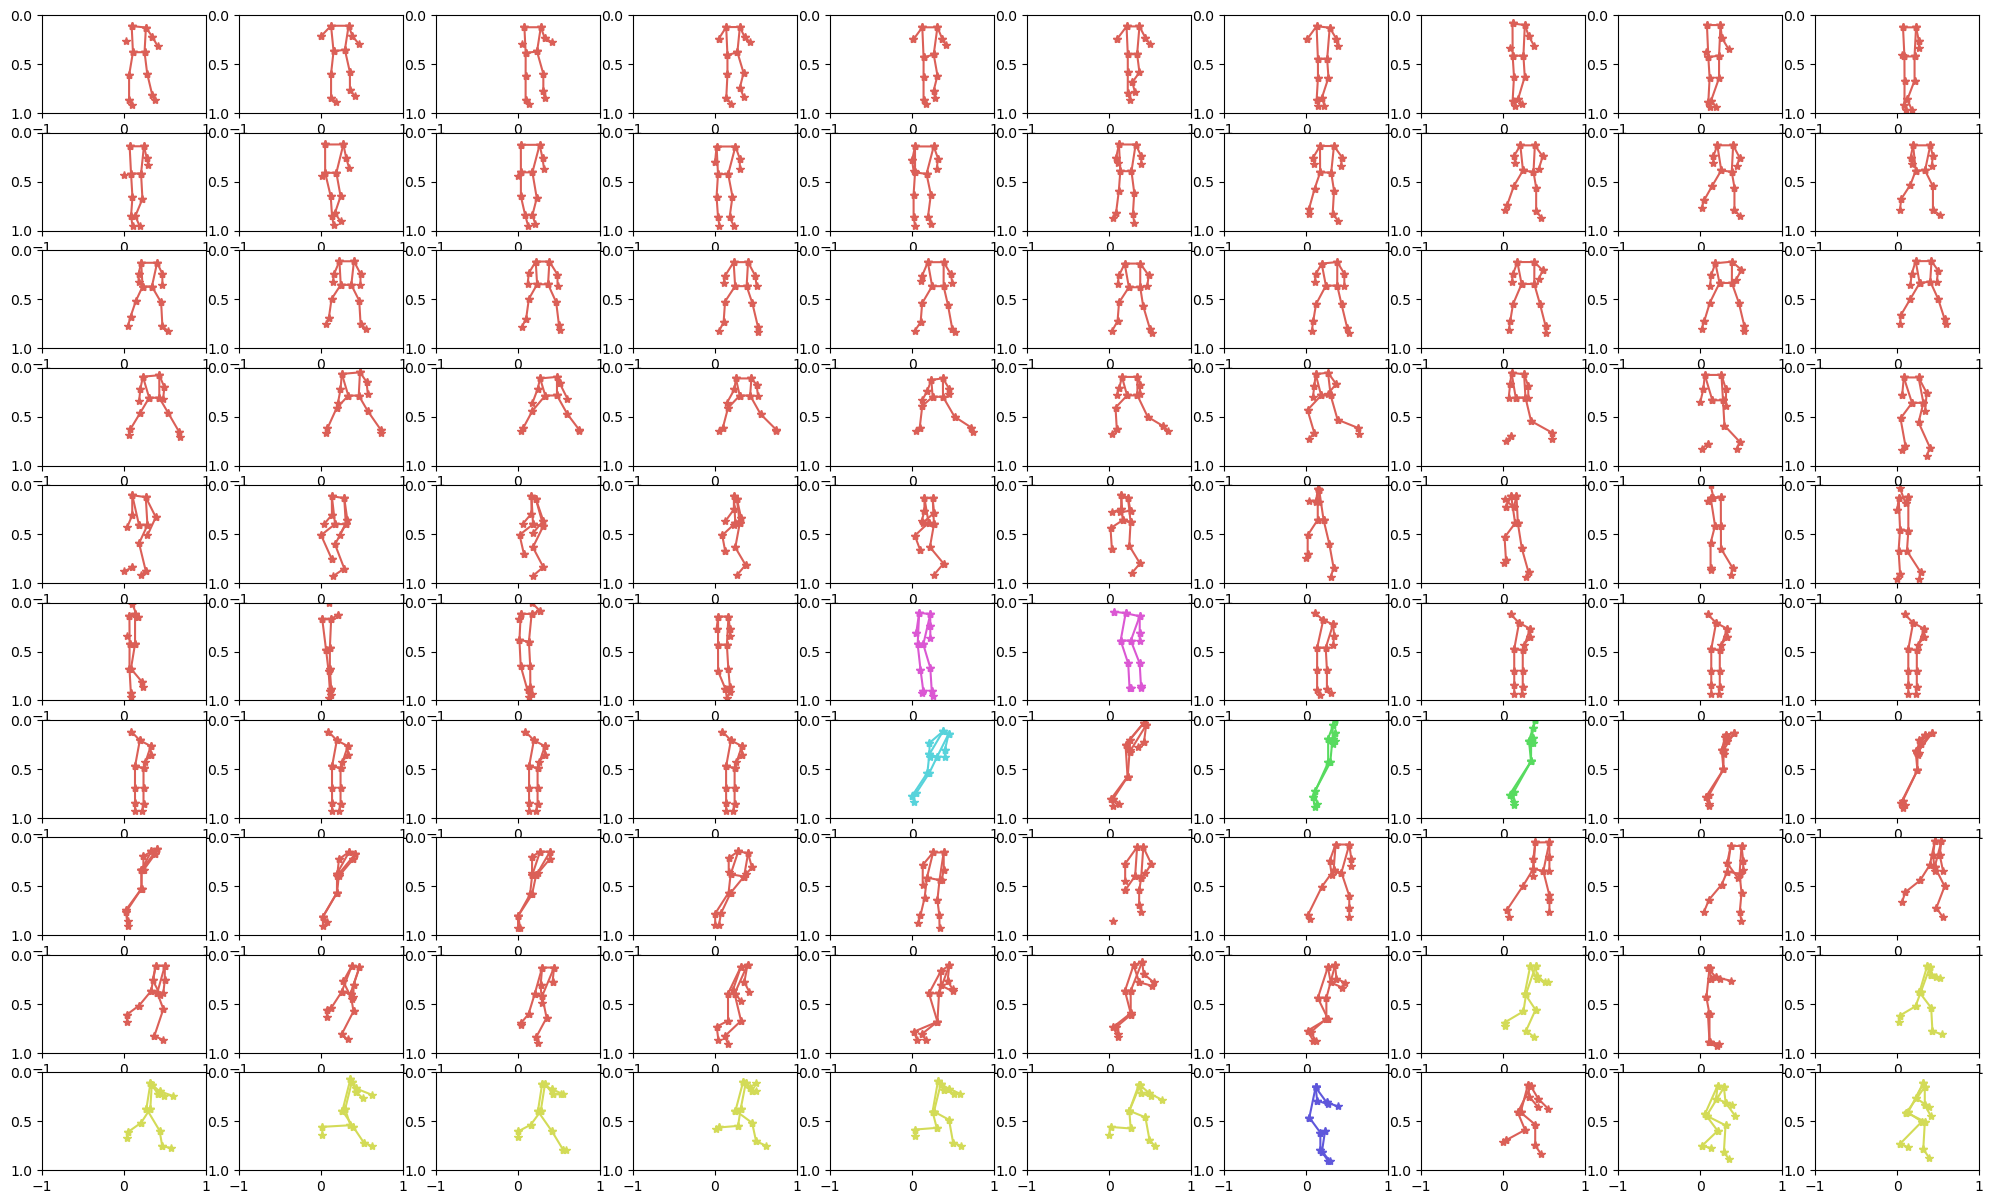

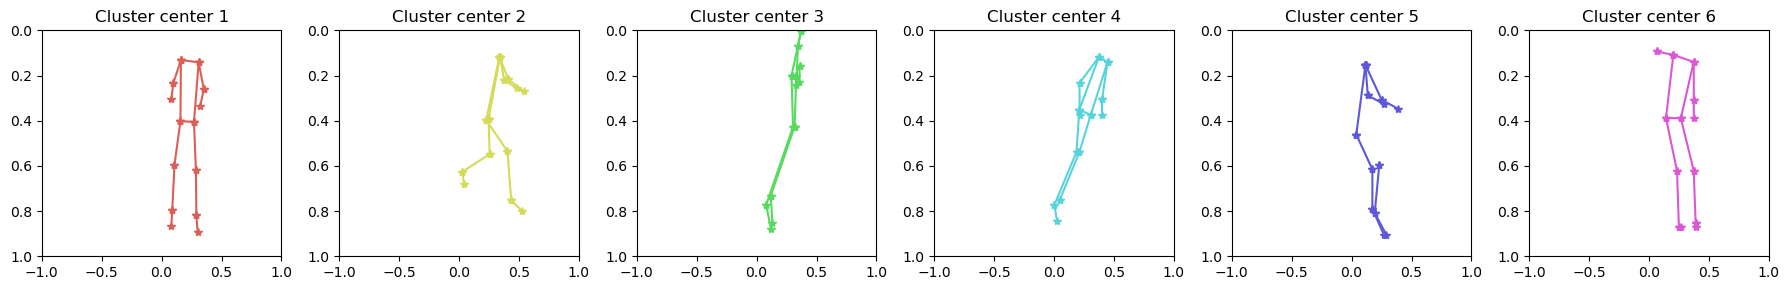

In [21]:
# Write your solution here
shift_cluster_labels = mean_shift.labels_
shift_centaur = mean_shift.cluster_centers_ # Thus the cluster centers haveth been extracted

colors = sns.color_palette("hls", len(shift_centaur))
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[shift_cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)


num_centroids = len(shift_centaur)
# Set up subplots
fig, axes = plt.subplots(1, num_centroids, figsize=(num_centroids * 3, 3))

# Assuming you have a function plot_single_pose defined
for i in range(len(shift_centaur)):
    plt.subplot(1, len(shift_centaur), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(shift_centaur[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.tight_layout()
plt.show()


---
**Task 11 (easy): Reflection and the bandwith parameter👩‍💻💡**
1. Visually examine the plots. What are the characteristics of the poses belonging to each cluster?
2. What is the purpose and what effect of decreasing and increasing the bandwidth parameter to 0.429 and 0.829 have and why?


**Info**
You might encounter longer run times for lower bandwith values.


---

In [ ]:
# Write your reflections here...
shift_scluster_answers = "01-Clustering.ipynb" \
"Red is default" \
"Blue is tripping to the left" \
"Green is getting off a horse" \
"Orange is stamping on the ground jump jump jump jump moving all around jumping on the ground (spillar dota)" \
"Black is trancending into the first dimension (getting raptured)" \
"" \
"Brown is blue but not folding their hands" \
"yellow is gone" \
"Cyan is running forward" \
"Salmon is missing half of their body" \
"Magenta is pointing a gun at you" \
"" \
"" \
"Decreasing the bandwith results in more clusters as the 'allowed' distance between poses is decreased" \
"Increasing the bandwith results in less clusters"



## Agglomerative Clustering
This exercise is about applying hierarchical clustering to the poses dataset.

---
**Task 12 (easy): Dendrograms👩‍💻**
1. Run the cell below to generate a dendrogram. 


---

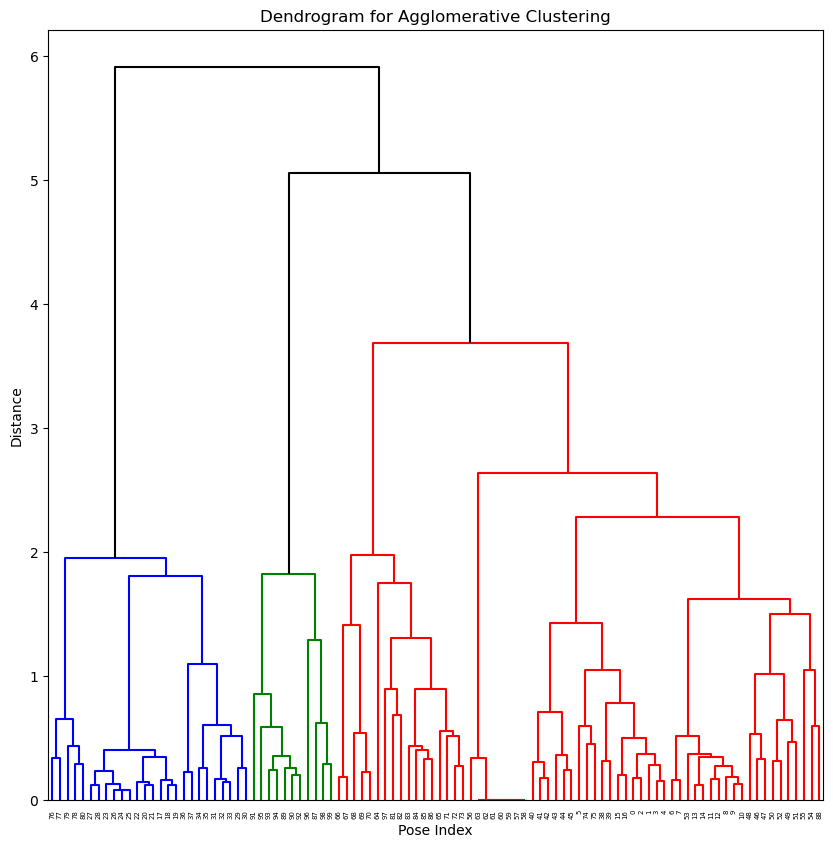

In [14]:
colors = {0: 'black', 1: 'blue', 2: 'green', 3: 'red'}
sns.set_palette([colors[i] for i in range(len(colors))])
shc.set_link_color_palette(None)
plt.figure(figsize=(10,10))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Pose Index')
plt.ylabel('Distance')
linkage_matrix = shc.linkage(sequence, method ='ward', metric="euclidean")
Dendrogram = shc.dendrogram(linkage_matrix)


---
**Task 13 (easy): Dendogram💡📽️**
1. How can the number of clusters be determined from the dendrogram?
2. What does the location of a merge node in the dendrogram represent? If two points merge at a very low height, what does it tell about them?
3. Explain what a large differences in node location in the dendogram imply.
4. How many clusters would result from setting the distance threshold to: 0.5, 1.5, 3.0, 4?
5. What types of relationships can agglomerative clustering reveal that non-hierarchical methods might miss?


---

In [15]:
# Write your reflection here...
"""01-Clustering.ipynb
1. We choose a distance (horizontal line) the clusters are defined by the intercections with vertical lines and the desired distance

2. The height of a merge-node determins the distance between the two groups of poses

3. That the poses are significantely different from each other

4. 0.5: a lot
   1.5: ~12-13 UwU
   3.0: cuatro
   4.0: 3

5. There is no need to define numbers of clusters in advance
"""



'01-Clustering.ipynb\n1. We choose a distance (horizontal line) the clusters are defined by the intercections with vertical lines and the desired distance\n\n2. The height of a merge-node determins the distance between the two groups of poses\n\n3. That the poses are significantely different from each other\n\n4. 0.5: a lot\n   1.5: ~12-13 UwU\n   3.0: cuatro\n   4.0: 3\n\n5. There is no need to define numbers of clusters in advance\n'


---
**Task 14 (easy): Fitting the agglomerative clustering algorithm👩‍💻**
1. Run the cell below creates an instance of the `AgglomerativeClustering()`
 class. The [documentation on agglomerative clustering is given here.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

2. Select the distance threshold that results in 3 clusters, then apply agglomerative clustering on the sequence. 
3. Extract the cluster labels for each pose in the sequence.
4. Visualize the pose sequence by assigning a distinct color to each pose based on its cluster.


---

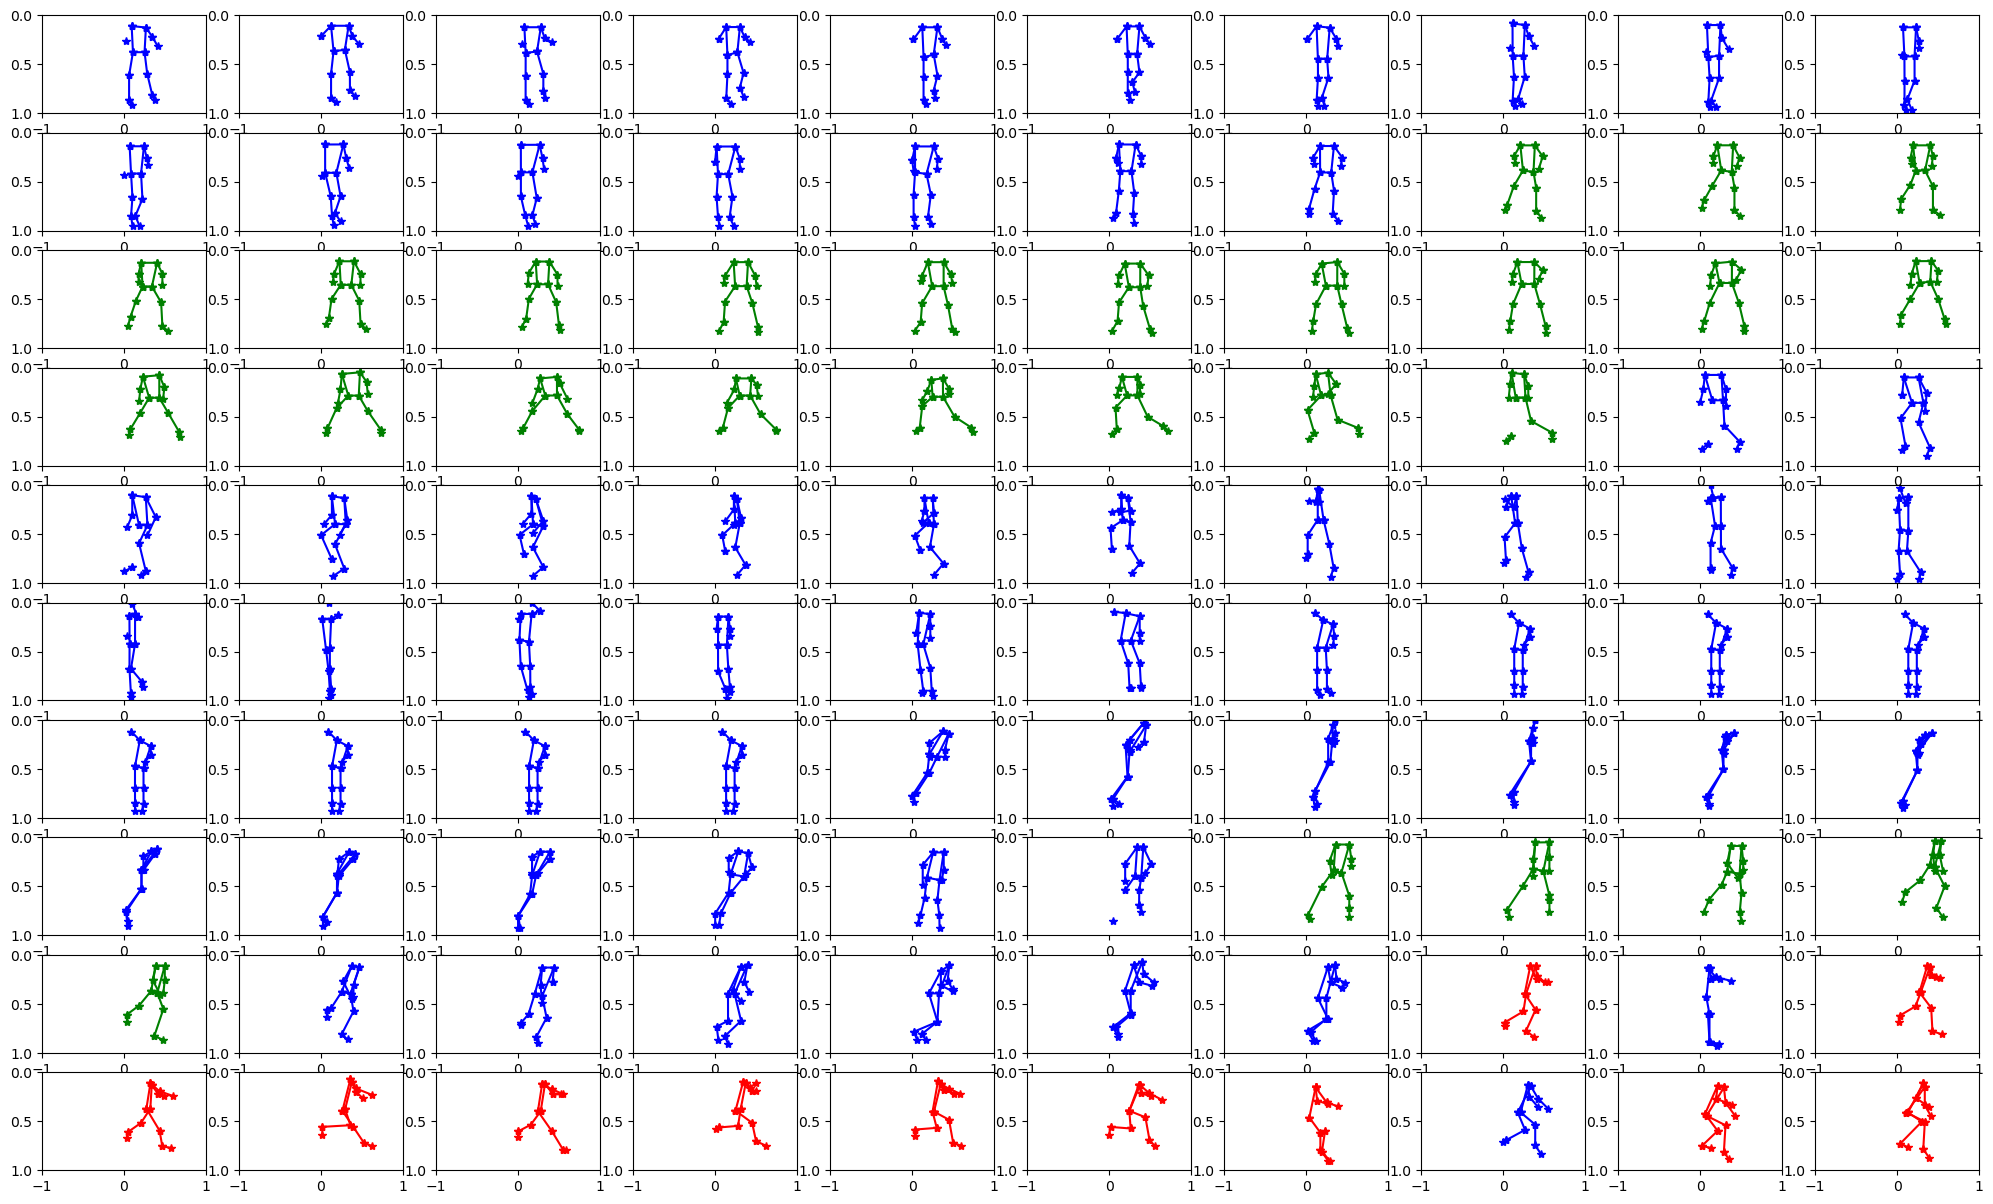

In [16]:
new_k = 3

agg_clustering = AgglomerativeClustering(n_clusters=new_k, metric='euclidean', linkage='ward')
agg_clustering.fit(sequence)

# Write your solution here (agglomerative clustering and cluster centers)
egg_labels = agg_clustering.labels_

colors = {0: 'blue', 1: 'green', 2: 'red'}

plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[egg_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)






---
**Task 15 (easy): Agglomerative clustreing algorithm mean pose👩‍💻**
1. The `AgglomerativeClustering()`
 class does not have a method for directly extracting cluster centers. Calculate the mean pose within each cluster for $k = 3$  and plot it.
2. Change the distance metric (try `l1`
 and `cosine`
) and repeat the previous two tasks ([Task 14](#loading11) and [Task 15](#loading12).1). 


---

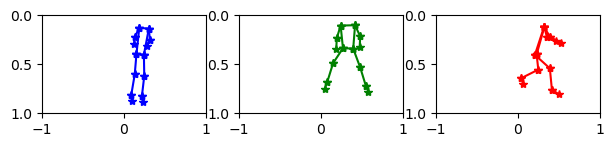

In [17]:
# Write your solution here
clusters = [[],[],[]]


for i in range(len(sequence)):
    clusters[egg_labels[i]].append(sequence[i])

mean_poses = []

for cluster in clusters:

    mean_poses.append((np.array(np.matrix(cluster).sum(axis=0)/len(cluster)))[0])

plt.figure(figsize=(25,15))
for i in range(len(mean_poses)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(mean_poses[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)


---
**Task 16 (easy): Agglomerative clustreing algorithm mean pose💡📽️**
1. What differences do you observe?
2. Explain why these differences occur? 
3. Does a different distance metric result in more meaningful clusters, why/why not?


---

In [18]:
# Write your reflections here...
asnsnsers = "01-Clustering.ipynb" \
"Blue is standing straight" \
"Green is spread eagle" \
"red is doing the runningman" \
"" \
"Because similar poses are clustered together and their means gived average poses which seem different form the other clusters" \
"Yes it does, more cluster mean more different poses but also less distance between the different clusters"

## Comparison

---
**Task 17 (medium): Compare and reflect on the methods👩‍💻💡📽️**
1. Compare the clustered poses obtained with the different clustering methods (K-means, Mean-shift and Agglomerative clustering). What are the similarities and differences between the pose clusters across methods?
2. Why can clusters look similar across methods? 
3. What are the main reasons behind differences in the clusters?
4. The algorithms use different methods for determining the number of clusters. How do these differences impact the results for the pose data?


---

In [ ]:
# Write your relfection here...
finallyIamsewers = "01-Clustering.ipynb" \
"K-means:" \
"   Need predefined or adjusted no. clusters" \
"   Sensitive to inital centers of clusters" \
"   Sensitive to outliers" \
"   Cannot make cool shapes, just makes convex hulls" \
"Mean shift:" \
"   Does not need predefined no. clusters, but a bandwidth which is made up (source: I saw it in a dream)" \
"   Robust against outliers" \
"   Multiple modes?" \
"   Does not scale well with a high featurespace"\
"Agglomerative:" \
"   Need predefined no. clusters" \
"   We can define which properties the clustering uses" \
"   It can make cool shapes" \
"   It is very sloow" \
"   It is bad at outliers" 